In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision 
from torchvision.transforms import transforms

torch.set_printoptions(linewidth=120)
# torch.set_grad_enabled(False)

In [2]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = t

        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

    
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        t = self.fc2(t)
        t = F.relu(t)
        t = self.out(t)

        return t


In [4]:
train_set = torchvision.datasets.FashionMNIST(root='/.data/', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))


In [5]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)


for epoch in range(5):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

        print(
            f'epoch {epoch}, total loss: {total_loss}, total correct: {total_correct}')


epoch 0, total loss: 2.301928997039795, total correct: 11
epoch 0, total loss: 4.612346172332764, total correct: 13
epoch 0, total loss: 6.907955884933472, total correct: 26
epoch 0, total loss: 9.1775963306427, total correct: 58
epoch 0, total loss: 11.424427032470703, total correct: 87
epoch 0, total loss: 13.54562258720398, total correct: 121
epoch 0, total loss: 15.479723811149597, total correct: 150
epoch 0, total loss: 17.25387704372406, total correct: 178
epoch 0, total loss: 18.806296348571777, total correct: 227
epoch 0, total loss: 20.368837594985962, total correct: 265
epoch 0, total loss: 21.990780234336853, total correct: 306
epoch 0, total loss: 23.46135926246643, total correct: 354
epoch 0, total loss: 24.748019576072693, total correct: 407
epoch 0, total loss: 26.242708444595337, total correct: 446
epoch 0, total loss: 27.66504955291748, total correct: 486
epoch 0, total loss: 28.760525345802307, total correct: 544
epoch 0, total loss: 29.970592141151428, total correct:

In [6]:
print(f'Prediction: {total_correct/len(train_set) * 100 :.2f} % probability')


Prediction: 87.86 % probability


In [7]:
len(train_set)

60000

In [8]:
len(train_set.targets)

60000

In [9]:
@torch.no_grad()                                   # turn of gradient tracking
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds), dim=0
        )
    return all_preds


In [10]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
train_preds = get_all_preds(network, prediction_loader)

In [11]:
train_preds.shape

torch.Size([60000, 10])

In [12]:
print(train_preds.requires_grad)

False


In [13]:
train_preds.grad

In [14]:
train_preds.grad_fn

### another way of locally turning off gradient tracking

In [15]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

In [16]:
print(train_preds.requires_grad)

False


In [17]:
train_preds.grad

In [18]:
train_preds.grad_fn

In [21]:

preds_correct = get_num_correct(train_preds, train_set.targets)

print(f'total correct: {preds_correct}')
print(f'accuracy: {preds_correct/len(train_set)}')


total correct: 53236
accuracy: 0.8872666666666666


In [22]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [24]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [25]:
stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)

In [26]:
stacked.shape

torch.Size([60000, 2])

In [27]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [28]:
stacked[0].tolist()

[9, 9]

In [34]:
cmt = torch.zeros(10, 10, dtype=torch.int32)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [35]:
for p in stacked:
    tl, pl = p.tolist()                        # tl= true label, pl = predicted label
    cmt[tl, pl] = cmt[tl, pl] + 1

In [32]:
cmt

tensor([[5593,    9,   60,   62,    9,    1,  228,    0,   38,    0],
        [  23, 5901,    2,   53,    6,    1,   12,    0,    2,    0],
        [ 120,    5, 4781,   43,  684,    4,  352,    0,   11,    0],
        [ 385,   95,   26, 5213,  187,    1,   83,    0,    9,    1],
        [  16,    5,  316,  181, 5189,    0,  283,    0,   10,    0],
        [   2,    2,    0,    2,    0, 5777,    0,  128,   40,   49],
        [1513,    8,  464,   96,  547,    0, 3332,    0,   40,    0],
        [   1,    0,    0,    0,    0,   36,    0, 5811,   17,  135],
        [  38,    2,   23,   19,   24,    6,   46,    3, 5839,    0],
        [   0,    0,    0,    0,    0,   18,    1,  165,   16, 5800]])

## another way of plotting confusiion matrix

In [41]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from resources.plotcm import plot_confusion_matrix


In [38]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5593,    9,   60,   62,    9,    1,  228,    0,   38,    0],
       [  23, 5901,    2,   53,    6,    1,   12,    0,    2,    0],
       [ 120,    5, 4781,   43,  684,    4,  352,    0,   11,    0],
       [ 385,   95,   26, 5213,  187,    1,   83,    0,    9,    1],
       [  16,    5,  316,  181, 5189,    0,  283,    0,   10,    0],
       [   2,    2,    0,    2,    0, 5777,    0,  128,   40,   49],
       [1513,    8,  464,   96,  547,    0, 3332,    0,   40,    0],
       [   1,    0,    0,    0,    0,   36,    0, 5811,   17,  135],
       [  38,    2,   23,   19,   24,    6,   46,    3, 5839,    0],
       [   0,    0,    0,    0,    0,   18,    1,  165,   16, 5800]],
      dtype=int64)

Confusion matrix, without normalization
[[5593    9   60   62    9    1  228    0   38    0]
 [  23 5901    2   53    6    1   12    0    2    0]
 [ 120    5 4781   43  684    4  352    0   11    0]
 [ 385   95   26 5213  187    1   83    0    9    1]
 [  16    5  316  181 5189    0  283    0   10    0]
 [   2    2    0    2    0 5777    0  128   40   49]
 [1513    8  464   96  547    0 3332    0   40    0]
 [   1    0    0    0    0   36    0 5811   17  135]
 [  38    2   23   19   24    6   46    3 5839    0]
 [   0    0    0    0    0   18    1  165   16 5800]]


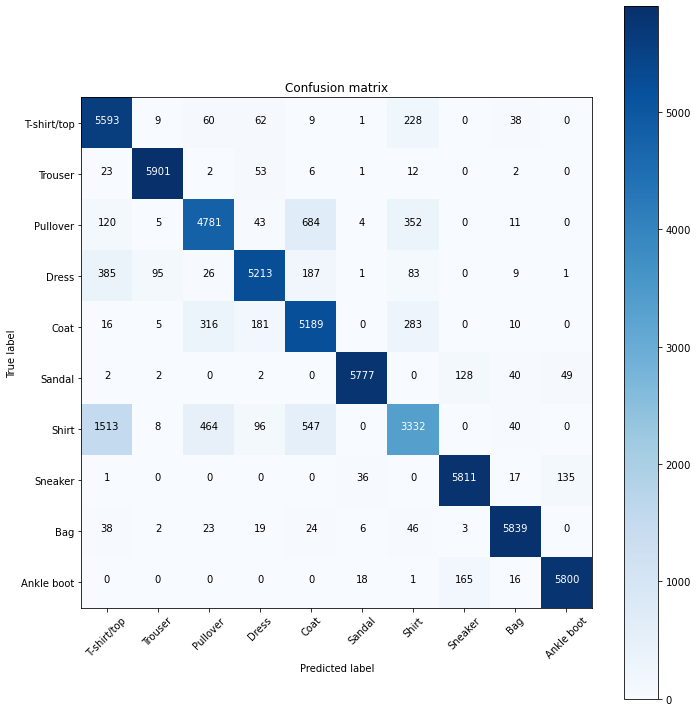

In [45]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, train_set.classes)
